# Heuristic Search 

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from map_utils import *
from search import *

## 1. The Fully Observable Environment

In [30]:
# create the environment
env = gym.make("MiniHack-HideNSeek-Mapped-v0", observation_keys=["chars", "pixel", "colors"])
# reset it to initial state
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  .                                             
                                  #.####.##.>                                   
                                  ....#..@#.#                                   
                                  #.#.###....                                   
                                  ...........                                   
                           

In [3]:
# create the custom environment
env = gym.make("MiniHack-Skill-Custom-v0", des_file="dat/fully_observable_c.des", observation_keys=["chars", "pixel", "colors"])
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                 .@.#.#......                                   
                                  ........#.#                                   
                                  #..##.#.#.#                                   
                                  #..##..##..                                   
                           

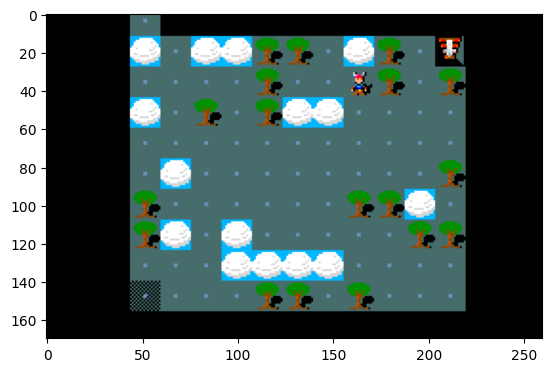

In [31]:
plt.imshow(state["pixel"][100:270, 500:760])

We'll start analysing a simple version of the problem, one that is fully observable and with a fixed monster (one that cannot hit range)

In [14]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (7, 34)
Target position: (15, 34)


In [17]:
%%time
path = a_star(game_map, color_map, start, target, chebyshev_distance)

Target found!
CPU times: user 3.49 s, sys: 512 ms, total: 4 s
Wall time: 2min 59s


In [15]:
actions = actions_from_path(start, path[1:])
print(actions)

[1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1, 6, 1, 1]


In [ ]:
image = plt.imshow(game[100:270, 500:760])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][100:270, 500:760])

In [55]:
# create the custom environment
env = gym.make("MiniHack-Skill-Custom-v0", des_file="dat/fully_observable_c.des", observation_keys=["chars", "pixel", "colors"])
state = env.reset()
# render the environment
env.render()


Hello Agent, welcome to NetHack!  You are a lawful human Caveman.               
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  @..##......                                   
                                  ###.#...#.#                                   
                                  .##....#..#                                   
                                  #......##.#                                   
                           

In [32]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (8, 41)
Target position: (7, 44)


In [28]:
def dynamic_pathfinding(game_map: np.ndarray, color_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], heuristic: callable):
    path = a_star(game_map, color_map, start, target, heuristic)
    actions = actions_from_path(start, path[1:])
    image = plt.imshow(game[100:270, 500:760])
    for index, action in enumerate(actions):
        if get_monster_location(game_map) is not None:
            print("Monster found!")
            new_path = a_star(game_map, color_map, path[index], target, heuristic)
            del actions[index+1:]
            actions.extend(actions_from_path(path[index], new_path[1:]))

        s, _, _, _ = env.step(action)


        display.display(plt.gcf())
        display.clear_output(wait=True)
        image.set_data(s['pixel'][100:270, 500:760])


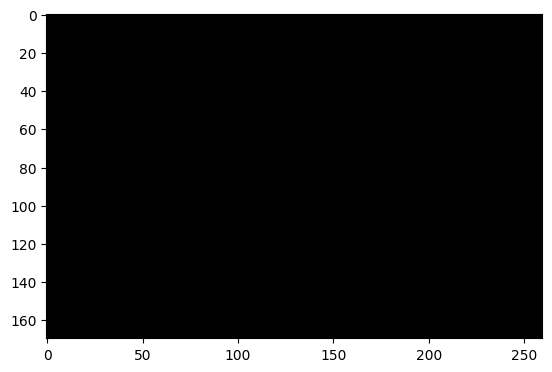

In [33]:
dynamic_pathfinding(game_map, color_map, start, target, chebyshev_distance)

Let's first try with just path_finding

In [7]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel", "colors"),
    des_file = "dat/simple_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

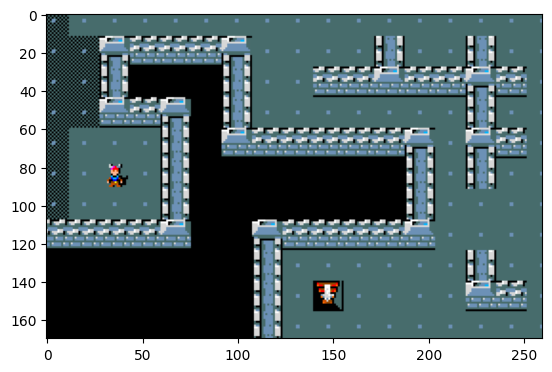

In [8]:
plt.imshow(state["pixel"][100:270, 500:760])

In [9]:
game_map = state["chars"]
color_map = state["colors"]
game = state["pixel"]

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (11, 33)
Target position: (15, 40)


In [10]:
%%time
path = a_star(game_map, color_map, start, target, chebyshev_distance)

CPU times: user 40.3 ms, sys: 1.98 ms, total: 42.3 ms
Wall time: 41.1 ms


In [11]:
actions = actions_from_path(start, path[1:])

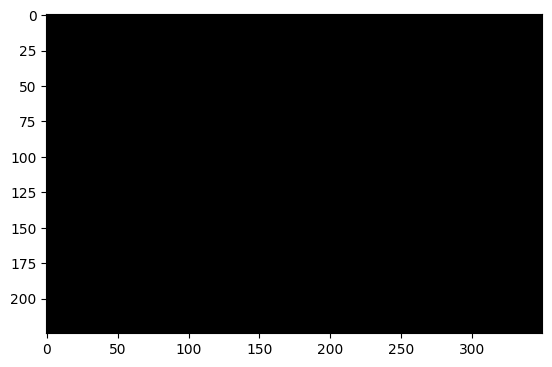

In [12]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])